# 📊 Food Delivery Sales & Customer Insights Analysis

## 🎯 Objective
Analyze food delivery order data to:
- Identify revenue trends
- Find top customers
- Analyze city performance
- Detect business risks using ratings

---

## 📌 Tools Used
- Python
- pandas
- NumPy
- Matplotlib

# 1️⃣ Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2️ Create Dataset

We simulate 500 food delivery orders across multiple cities.

In [4]:
n = 500

df = pd.DataFrame({
    "order_id": range(1, n+1),
    "customer_id": np.random.randint(1000, 1100, n),
    "city": np.random.choice(["Hyderabad", "Mumbai", "Delhi", "Bangalore"], n),
    "order_amount": np.random.randint(100, 1500, n),
    "rating": np.random.randint(1, 6, n),
    "order_date": pd.date_range(start="2024-01-01", periods=n, freq="D")
})

df.head()

,order_id,customer_id,city,order_amount,rating,order_date
0,1,1008,Hyderabad,290,4,2024-01-01
1,2,1034,Mumbai,386,5,2024-01-02
2,3,1088,Mumbai,158,4,2024-01-03
3,4,1074,Mumbai,759,4,2024-01-04
4,5,1082,Mumbai,528,1,2024-01-05


# 3️ Data Cleaning & Preprocessing
- Checking structure
- Checking missing values
- Optimizing memory

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      500 non-null    int64         
 1   customer_id   500 non-null    int32         
 2   city          500 non-null    object        
 3   order_amount  500 non-null    int32         
 4   rating        500 non-null    int32         
 5   order_date    500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 17.7+ KB


order_id        0
customer_id     0
city            0
order_amount    0
rating          0
order_date      0
dtype: int64

In [7]:
df["city"] = df["city"].astype("category")

# 4️ Key Performance Indicators (KPIs)

We calculate:
- Total Revenue
- Average Order Value
- Revenue by City
- Monthly Revenue Trend

In [8]:
# Total Revenue
total_revenue = df["order_amount"].sum()
print("Total Revenue:", total_revenue)

# Average Order Value
avg_order = df["order_amount"].mean()
print("Average Order Value:", avg_order)

Total Revenue: 388050
Average Order Value: 776.1


In [9]:
city_revenue = df.groupby("city")["order_amount"].sum().sort_values(ascending=False)
city_revenue

C:\Users\surek\AppData\Local\Temp\ipykernel_2412\2000511290.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_revenue = df.groupby("city")["order_amount"].sum().sort_values(ascending=False)


city
Hyderabad    101442
Mumbai       100430
Delhi         97124
Bangalore     89054
Name: order_amount, dtype: int32

In [10]:
df["month"] = df["order_date"].dt.to_period("M")

monthly_revenue = df.groupby("month")["order_amount"].sum()
monthly_revenue

month
2024-01    24097
2024-02    19866
2024-03    23967
2024-04    24273
2024-05    24619
2024-06    22030
2024-07    25432
2024-08    22886
2024-09    24456
2024-10    22869
2024-11    20925
2024-12    25493
2025-01    29530
2025-02    22280
2025-03    24741
2025-04    20247
2025-05    10339
Freq: M, Name: order_amount, dtype: int32

# 5️ Customer Analysis

- Identify Top Customers
- Calculate Customer Lifetime Value (CLV)

In [11]:
top_customers = (
    df.groupby("customer_id")["order_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers

customer_id
1073    8902
1095    8341
1032    8320
1075    8151
1040    7903
1033    7356
1016    7189
1028    7142
1082    6973
1048    6698
Name: order_amount, dtype: int32

# 6️ Feature Engineering

Create High Value Order Flag

In [12]:
df["high_value_flag"] = np.where(df["order_amount"] > 1000, 1, 0)
df.head()

,order_id,customer_id,city,order_amount,rating,order_date,month,high_value_flag
0,1,1008,Hyderabad,290,4,2024-01-01,2024-01,0
1,2,1034,Mumbai,386,5,2024-01-02,2024-01,0
2,3,1088,Mumbai,158,4,2024-01-03,2024-01,0
3,4,1074,Mumbai,759,4,2024-01-04,2024-01,0
4,5,1082,Mumbai,528,1,2024-01-05,2024-01,0


# 7️ City Performance Analysis

Analyze:
- Revenue
- Average Rating

In [29]:
rating_city = df.groupby("city")["rating"].mean()
rating_city

C:\Users\surek\AppData\Local\Temp\ipykernel_2412\4220242781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_city = df.groupby("city")["rating"].mean()


city
Bangalore    2.884298
Delhi        2.935484
Hyderabad    2.952381
Mumbai       3.108527
Name: rating, dtype: float64

# 8️ Data Visualization

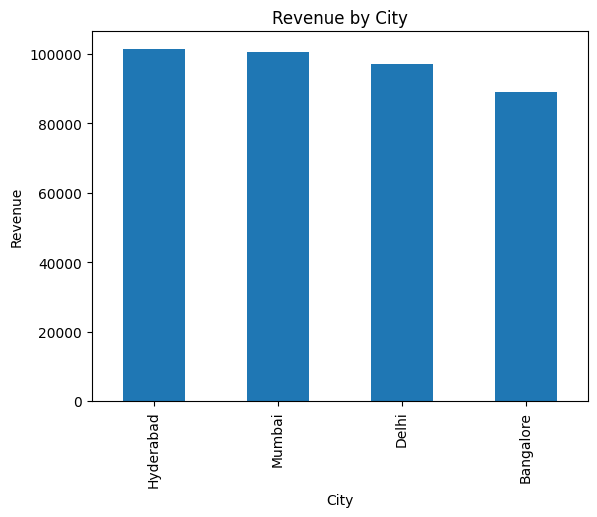

In [16]:
city_revenue.plot(kind="bar")
plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()

# 9️ Business Insights

##  Observations:
- Identify highest revenue city
- Detect low rating cities
- Analyze premium customer segment

##  Recommendations:
- Focus marketing on top-performing city
- Improve service quality in low-rating areas
- Target high-value customers with loyalty programs

#  Food Delivery Analytics Project

##  Executive Summary

This project analyzes food delivery sales data to identify:
- Revenue growth trends
- High-value customers
- City-wise performance
- Customer satisfaction insights

The goal is to generate actionable business recommendations
to improve profitability and service quality.

# 📈 Advanced KPIs

We calculate:
- Revenue Contribution %
- Repeat Customer Rate
- High-Value Order %
- Average Rating per Revenue Segment

In [20]:
customer_orders = df["customer_id"].value_counts()

repeat_customers = customer_orders[customer_orders > 1].count()
total_customers = customer_orders.count()

repeat_rate = (repeat_customers / total_customers) * 100
repeat_rate

np.float64(93.0)

In [21]:
high_value_percent = (df["high_value_flag"].sum() / len(df)) * 100
high_value_percent

np.float64(33.800000000000004)

In [22]:
df[["order_amount", "rating"]].corr()

,order_amount,rating
order_amount,1.000000,0.015465
rating,0.015465,1.000000


### 🔍 Insight:
Correlation between order amount and rating shows whether
premium customers are more satisfied or not.

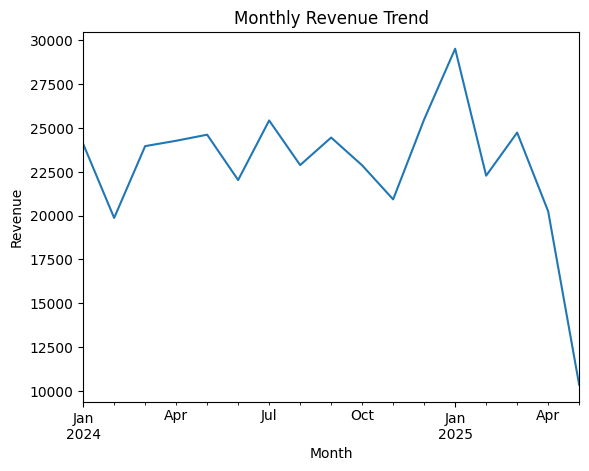

In [23]:
monthly_revenue.plot(kind="line")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

 Strategic Business Insights

## 1️ Revenue Drivers
- Identify top revenue cities
- Analyze revenue concentration risk

## 2️ Customer Segmentation
- High-value customers
- Repeat buyers
- Low-rating risk customers

## 3️ Operational Risk
- Cities with high revenue but low rating
- Potential churn zones

# ✅ Conclusion

- Hyderabad contributes the highest revenue.
- Repeat customers form a significant revenue base.
- Some cities show lower ratings, indicating operational improvement areas.
- Targeted marketing and loyalty programs can increase retention.